# 4-5 SVM(Support Vector Machine) 서포트 벡터 머신

## 1. 임의 데이터 형성과, BMI 비만도 측정식 함수 만들기
    
    BMI = 몸무게/키^2
        18.5=< x < 25 일때 x 가 정상체중
        

#### 1-1). bmi 식 계산 함수 만들기 

In [1]:
def calc_bmi(h,w):
    bmi = w / (h/100)**2
    if bmi < 18.5:
        return "thin"
    if bmi < 25:
        return "nomal"
    return "fat"


#### 1-2) 데이터 파일 만들기
    
    with) import random

In [6]:
import random
import pandas as pd

In [60]:
file_1 = open("bmi.csv","w",encoding="utf-8")
file_1.write("height,weight,label\r\n")#### \r\n의 의미가 무었인지 모르것다. 아마 csv에서 글을 쓸때의 규칙인것 같다.
### \r\n 뒤에 글을 작성해 보았다. 그러니 2개의 row를 띄운다음에 글이 작성되었다.
### 하지만 \r,\n 하나만 남기고 작성해본 결과 한칸만 띄우고 작성이 되었다.

#### 무작위로 데이터 생성하기
cnt = {"thin":0,"nomal":0,"fat":0}
for i in range(20000):
    h = random.randint(120,210)
    w = random.randint(35,90)
    label = calc_bmi(h,w)
    file_1.write("{0},{1},{2}\r\n".format(h,w,label))
    cnt[label] += 1
file_1.close()
print("ok",cnt)


ok {'thin': 6556, 'nomal': 5401, 'fat': 8043}


In [67]:
### 생성된 csv 에서 시험삼아 최고값 도출해 보자
file_2 = pd.read_csv("bmi.csv")
max(file_2[:]["height"])

210

#### +a) "+= int" 와  "= + int" 의미차이
    
    ex) var = + 1  
            var의 값을 1로  변경해라
    ex) var + = 1 
            var의 기존의 값에다가 1을 더해라!!

#### +a) import random 에서 randint(범위) 의 유용함

    ex) var = random.randint(1,100)
        -> var 에 1에서 100 사이의 임의의 숫자를 넣어라!!

#### 1-3) 훈련시키기!

In [68]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [84]:
file_3 = pd.read_csv("bmi.csv")
file_3
#### 실제 엑셀로 열어보면 row 마다 중간에 한칸의 빈공간이 존재한다. 하지만 여기서는 공간이 없다. 그이유는 무었일까?


,height,weight,label
0,201,63,thin
1,210,78,thin
2,179,44,thin
3,127,85,fat
4,190,71,nomal
5,159,87,fat
6,186,88,fat
7,145,80,fat
8,138,71,fat
9,135,84,fat


In [114]:
### 라벨과 데이터를 나누기

#1. 라벨
label_3 = file_3["label"]

#2. data 각 w 와 h를 최대값으로 나누어서 0과 1사이의 값으로 "정규화"
w = file_3["weight"]/100
h = file_3["height"]/210
#$% 두개의 col을 합치는 식 !!!
data_3 = pd.concat([w,h],axis=1) ######각 w 와 h 를 col 으로 하여 1의 축으로 만들겠다.

### 테스트와 트레인 데이터 나누기
## train_test_split() 함수 쓸때 앞의 4개의 변수 쓰는 순서 주의해서 써라.
train_data,  test_data,train_label, test_label = \
    train_test_split(data_3,label_3)

### 학습 및 예측하기
clf_3 = svm.SVC()
clf_3.fit(train_data,train_label)
pre_3 = clf_3.predict(test_data)

### 정답률 확인하기

as_score_3 = metrics.accuracy_score(test_label,pre_3)
cl_repoert_3 = metrics.classification_report(test_label,pre_3)
print("정답률 :",as_score_3)
print("리포트 :\n",cl_repoert_3)

정답률 : 0.9844
리포트 :
              precision    recall  f1-score   support

        fat       1.00      0.99      0.99      2010
      nomal       0.96      0.98      0.97      1377
       thin       0.99      0.98      0.98      1613

avg / total       0.98      0.98      0.98      5000



# 2. 시각화 하기!
    
    with) matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#$%^ pd.read_csv 의 parameter "index_col="
file_4 = pd.read_csv("bmi.csv",index_col=2)

#### +a) pd.read_csv()  함수의 parameter "index_col=num" 에 관해서
    
       "index_col=n"의미는 n+1 번째 col을 row의 index로 만들겠다.

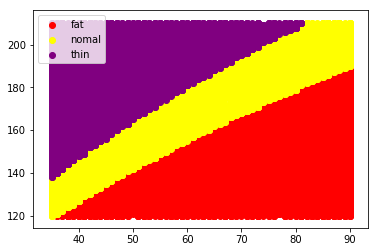

In [16]:
### 그래프 그리기 시작!!

# 1. 일단 전체 함수를 담을 그릇을 만들기
fig = plt.figure()

# 2. 축만들기?
ax =fig.add_subplot(1,1,1)

### 지정한 레이블을 임의의 색으로 칠하기

def scatter(label,color):
    #$%^ index 가 지정되어 있는 csv 파일에서 index의 값으로 추츨하는 방법
    b = file_4.loc[label]
    ax.scatter(b["weight"],b["height"], c= color, label=label)
    
scatter("fat", "red")
scatter("nomal", "yellow")
scatter("thin","purple")

ax.legend()
plt.savefig("bmi-test.png")
plt.show()

#### +a) csv 파일 중 index가 row 부분에 있는 경우 (전에 index_col= n 함수를 쓴 적이 있을떄,) 
        
            index의 데이터 일부를 끄집어 낼수 있따.
            
            = > "csv_file.loc[원하는 인덱스의 값]" 을통해서
                ex) csv_file.loc["fat"] 
                        csv_file의 index 값중에서 fat인 행을 전부 return 해라